In [1]:
import tensorflow as tf
print(tf.__version__)

2.3.0


In [2]:
from tensorflow.keras.layers import Input, SimpleRNN, GRU, LSTM, Dense, Flatten
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import SGD, Adam

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
# make the original data
series = np.sin((0.1*np.arange(400))**2)

This is a time series of the form:

$$ x(t) = \sin(\omega t^2) $$

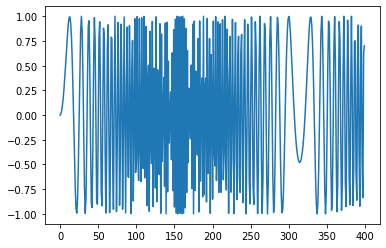

In [4]:
# plot it
plt.plot(series)
plt.show()

In [5]:
### build the dataset
# let's see if we can use T past values to predict the next value
T = 10
D = 1
X = []
Y = []
for t in range(len(series) - T):
  x = series[t:t+T]
  X.append(x)
  y = series[t+T]
  Y.append(y)

X = np.array(X).reshape(-1, T) # make it N x T
Y = np.array(Y)
N = len(X)
print("X.shape", X.shape, "Y.shape", Y.shape)

X.shape (390, 10) Y.shape (390,)


In [6]:
### try autoregressive linear model
i = Input(shape=(T,))
x = Dense(1)(i)
model = Model(i, x)
model.compile(
  loss='mse',
  optimizer=Adam(lr=0.01),
)

# train the RNN
r = model.fit(
  X[:-N//2], Y[:-N//2],
  epochs=80,
  validation_data=(X[-N//2:], Y[-N//2:]),
)

Epoch 1/80
7/7 [==============================] - 0s 30ms/step - loss: 1.4264 - val_loss: 1.3081
Epoch 2/80
7/7 [==============================] - 0s 4ms/step - loss: 1.1974 - val_loss: 1.1923
Epoch 3/80
7/7 [==============================] - 0s 4ms/step - loss: 1.0302 - val_loss: 1.0862
Epoch 4/80
7/7 [==============================] - 0s 4ms/step - loss: 0.8927 - val_loss: 1.0070
Epoch 5/80
7/7 [==============================] - 0s 4ms/step - loss: 0.8000 - val_loss: 0.9480
Epoch 6/80
7/7 [==============================] - 0s 4ms/step - loss: 0.7251 - val_loss: 0.8795
Epoch 7/80
7/7 [==============================] - 0s 4ms/step - loss: 0.6706 - val_loss: 0.8236
Epoch 8/80
7/7 [==============================] - 0s 4ms/step - loss: 0.6295 - val_loss: 0.7763
Epoch 9/80
7/7 [==============================] - 0s 4ms/step - loss: 0.5985 - val_loss: 0.7378
Epoch 10/80
7/7 [==============================] - 0s 4ms/step - loss: 0.5725 - val_loss: 0.7109
Epoch 11/80
7/7 [=====================

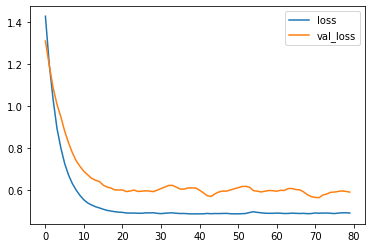

In [7]:
# Plot loss per iteration
import matplotlib.pyplot as plt
plt.plot(r.history['loss'], label='loss')
plt.plot(r.history['val_loss'], label='val_loss')
plt.legend()

(390, 1)


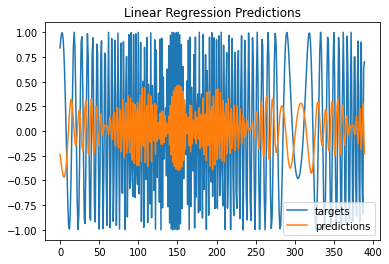

In [8]:
# One-step forecast using true targets
# Note: even the one-step forecast fails badly
outputs = model.predict(X)
print(outputs.shape)
predictions = outputs[:,0]

plt.plot(Y, label='targets')
plt.plot(predictions, label='predictions')
plt.title("Linear Regression Predictions")
plt.legend()
plt.show()

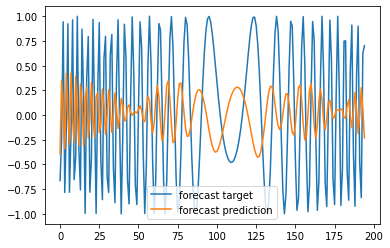

In [9]:
# This is the code we had before - it does the same thing

# One-step forecast using true targets

validation_target = Y[-N//2:]
validation_predictions = []

# index of first validation input
i = -N//2

while len(validation_predictions) < len(validation_target):
  p = model.predict(X[i].reshape(1, -1))[0,0] # 1x1 array -> scalar
  i += 1
  
  # update the predictions list
  validation_predictions.append(p)

plt.plot(validation_target, label='forecast target')
plt.plot(validation_predictions, label='forecast prediction')
plt.legend()

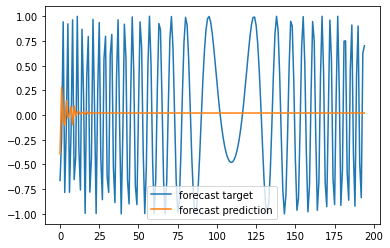

In [10]:
# Multi-step forecast
validation_target = Y[-N//2:]
validation_predictions = []

# first validation input
last_x = X[-N//2] # 1-D array of length T

while len(validation_predictions) < len(validation_target):
  p = model.predict(last_x.reshape(1, -1))[0,0] # 1x1 array -> scalar
  
  # update the predictions list
  validation_predictions.append(p)
  
  # make the new input
  last_x = np.roll(last_x, -1)
  last_x[-1] = p

plt.plot(validation_target, label='forecast target')
plt.plot(validation_predictions, label='forecast prediction')
plt.legend()

In [11]:
### Now try RNN/LSTM model
X = X.reshape(-1, T, 1) # make it N x T x D

# make the RNN
i = Input(shape=(T, D))
x = LSTM(10)(i)
x = Dense(1)(x)
model = Model(i, x)
model.compile(
  loss='mse',
  optimizer=Adam(lr=0.05),
)

# train the RNN
r = model.fit(
  X[:-N//2], Y[:-N//2],
  batch_size=32,
  epochs=200,
  validation_data=(X[-N//2:], Y[-N//2:]),
)

Epoch 1/200
7/7 [==============================] - 0s 56ms/step - loss: 0.5108 - val_loss: 0.6190
Epoch 2/200
7/7 [==============================] - 0s 7ms/step - loss: 0.5065 - val_loss: 0.5778
Epoch 3/200
7/7 [==============================] - 0s 7ms/step - loss: 0.4240 - val_loss: 0.5095
Epoch 4/200
7/7 [==============================] - 0s 7ms/step - loss: 0.3521 - val_loss: 0.4555
Epoch 5/200
7/7 [==============================] - 0s 7ms/step - loss: 0.3020 - val_loss: 0.3327
Epoch 6/200
7/7 [==============================] - 0s 7ms/step - loss: 0.2380 - val_loss: 0.3242
Epoch 7/200
7/7 [==============================] - 0s 7ms/step - loss: 0.1778 - val_loss: 0.1904
Epoch 8/200
7/7 [==============================] - 0s 7ms/step - loss: 0.1301 - val_loss: 0.1215
Epoch 9/200
7/7 [==============================] - 0s 8ms/step - loss: 0.0794 - val_loss: 0.1281
Epoch 10/200
7/7 [==============================] - 0s 7ms/step - loss: 0.0495 - val_loss: 0.0855
Epoch 11/200
7/7 [==========

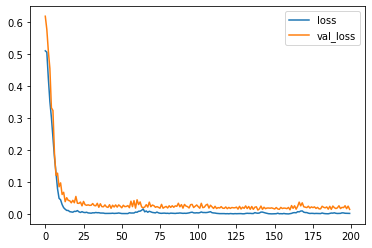

In [13]:
# plot some data
plt.plot(r.history['loss'], label='loss')
plt.plot(r.history['val_loss'], label='val_loss')
plt.legend()
plt.show()

(390, 1)


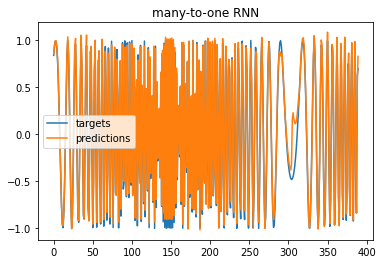

In [14]:
# One-step forecast using true targets
outputs = model.predict(X)
print(outputs.shape)
predictions = outputs[:,0]

plt.plot(Y, label='targets')
plt.plot(predictions, label='predictions')
plt.title("many-to-one RNN")
plt.legend()
plt.show()

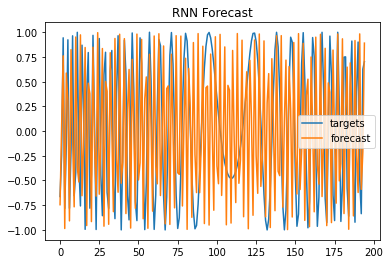

In [15]:
# Multi-step forecast
forecast = []
input_ = X[-N//2]
while len(forecast) < len(Y[-N//2:]):
  # Reshape the input_ to N x T x D
  f = model.predict(input_.reshape(1, T, 1))[0,0]
  forecast.append(f)

  # make a new input with the latest forecast
  input_ = np.roll(input_, -1)
  input_[-1] = f

plt.plot(Y[-N//2:], label='targets')
plt.plot(forecast, label='forecast')
plt.title("RNN Forecast")
plt.legend()
plt.show()